# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import seaborn as sns
import copy
import numpy as np

# set this so the graphs open internally
%matplotlib inline

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [ ]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding = 'latin1')

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

Text(0.5, 0, 'Country')

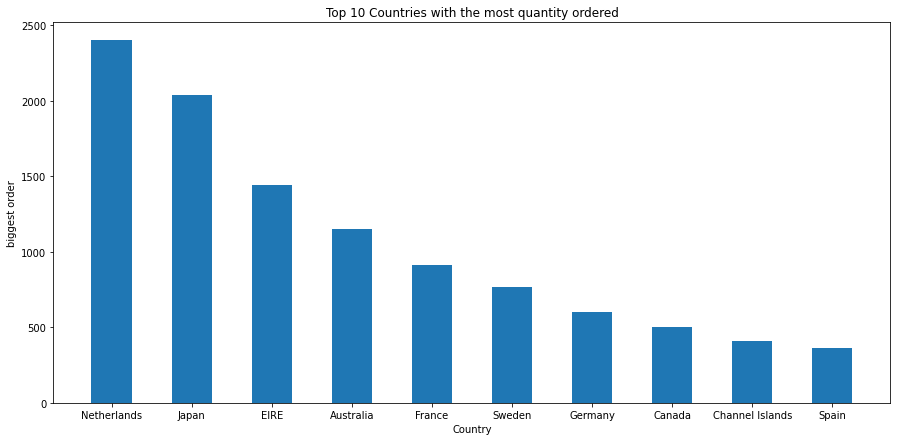

In [ ]:
country_quantity = pd.DataFrame(online_rt.groupby('Country')['Quantity'].max().sort_values(ascending = False)).iloc[1:,:].reset_index().head(10)
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(country_quantity.Country, height=country_quantity.Quantity, width= 0.5)
plt.title('Top 10 Countries with the most quantity ordered')
plt.ylabel('biggest order')
plt.xlabel('Country')

### Step 5.  Exclude negative Quantity entries

In [ ]:
online_rt.loc[online_rt['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,"17,850.00",United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,"12,680.00",France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,"12,680.00",France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,"12,680.00",France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,"12,680.00",France


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

/tmp/ipykernel_633/1789046131.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sc_online_rt = pd.DataFrame(sc_online_rt.groupby(by = ['Country','CustomerID'])['Quantity','UnitPrice'].sum())
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


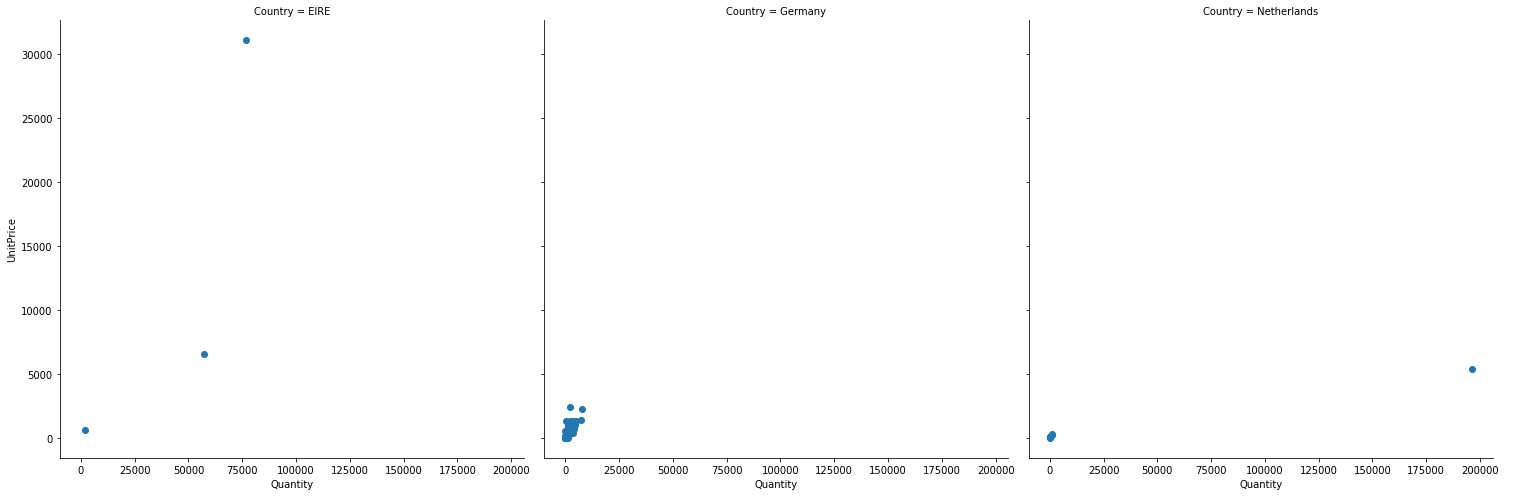

In [ ]:
# Add the top contries to a variable called top_c.
top_c =  ['Netherlands', 'EIRE', 'Germany']

# Filter using isin func with the top_c variable.
sc_online_rt = online_rt.loc[online_rt['Country'].isin(top_c)]

# Filter negative values.
sc_online_rt = sc_online_rt.loc[online_rt.UnitPrice > 0]

# Groupby CustomerID and UnitPrice and count each one.
sc_online_rt = pd.DataFrame(sc_online_rt.groupby(by = ['Country','CustomerID'])['Quantity','UnitPrice'].sum())

#Reset the index.
sc_online_rt = sc_online_rt.reset_index()

sc_online_rt

#Create the scatter plot.
ax = sns.FacetGrid(sc_online_rt, col = 'Country', size = 7)
ax.map(plt.scatter,'Quantity', 'UnitPrice', alpha = 1)
ax.add_legend()

### 7. Plot a line chart showing revenue (y) per UnitPrice (x).

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 7.1 Group `UnitPrice` by intervals of 1 for prices [0,50], and sum `Quantity` and `Revenue`.

In [ ]:
# Bring the data without modifications:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding = 'latin1')

In [ ]:
# Create the revenue column:
online_rt['revenue'] = online_rt.UnitPrice * online_rt.Quantity

In [ ]:
# Round the Unit Price for the plot:
online_rt = pd.DataFrame(online_rt.groupby(pd.cut(online_rt.UnitPrice,np.arange(0,51,1))).revenue.sum()).reset_index()

#### 7.2 Plot.

Text(0, 0.5, 'Interval of UnitPrice')

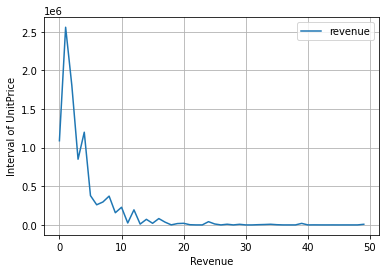

In [ ]:
# Plot:
online_rt.plot()
plt.grid()
plt.xlabel('Revenue')
plt.ylabel('Interval of UnitPrice')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe744348-fecc-4b7a-803c-44dba24ecb38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>